# Colaboratory

## Introduction



Some important links to keep open during the workshop – open these tabs **now**!:

- [TF documentation](https://www.tensorflow.org/api_docs/python/tf) : Use the search box (top right) to get documentation on Tensorflow's rich API.

- [solutions/](https://github.com/tensorflow/workshops/tree/master/extras/amld/notebooks/solutions) : Every notebook in the `exercises/` directory has a corresponding notebook in the `solutions/` directory.

---

Colaboratory (Colab) is a Jupyter notebook environment which allows you to work with data and code in an interactive manner. You can decide where you want to run your code:

*   Using a hosted runtime provided by Google (**default**)
*   Locally using your own machine and resources

It supports Python 3 and comes with a set of pre-installed libraries like Tensorflow and Matplotlib but also gives you the option to install more libraries on demand. The resulting notebooks can be shared in a straightforward way.

Caveats:

*   The virtual machines used for the runtimes are **ephemeral** so make sure to safe your data in a persistent location like locally (downloading), in the Google Cloud Storage or Google Drive.
*   The service is free of use but the performance of default runtimes can be insufficient for your purposes.
*  You have the option to select a runtime with GPU or TPU support.
*  "Colaboratory is intended for interactive use. Long-running background computations, particularly on GPUs, may be stopped. [...] We encourage users who wish to run continuous or long-running computations through Colaboratory’s UI to use a local runtime." - See [Colaboratory FAQ](https://research.google.com/colaboratory/faq.html "Colaboratory FAQ")

**Getting started**

1.   Connect to a runtime now by clicking `connect` in the top right corner if you don't already see a green checkmark there.
2.   To get a better overview you might want to activate the *Table of contents* by clicking on the arrow on the left.

### Important shortcuts

Action | Colab Shortcut | Jupyter Shortcut
---|---|---
Executes current cell | `<CTRL-ENTER>` | `<CTRL-ENTER>`
Executes current cell and moves to next cell | `<SHIFT-ENTER>` | `S<HIFT-ENTER>`
Executes current selection | `<CTRL-SHIFT-ENTER>` | `N/A`
Insert cell above | `<CTRL-M> <A>` | `<A>`
Append cell below | `<CTRL-M> <B>` | `<B>`
Shows searchable command palette | `<CTRL-SHIFT-P>` | `<CTRL-SHIFT-P>`
Convert cell to code | `<CTRL-M> <Y>` | `<Y>`
Convert cell to Markdown | `<CTRL-M> <M>` | `<M>`
Autocomplete (on by default) | `<CTRL+SPACE>` | `<TAB>`
Goes from edit to "command" mode | `<ESC>` | `<ESC>`
Goes from "command" to edit mode | `<ENTER>` | `<ENTER>`
Show keyboard shortcuts | `<CTRL-M> <H>` | `<H>`
<p align="center"><b>Note:</b> On OS X you can use `<COMMAND>` instead of `<CTRL>`</p>

Give it a try!

In [1]:
# YOUR ACTION REQUIRED:
# Execute this cell first using <CTRL-ENTER> and then using <SHIFT-ENTER>.
# Note the difference in which cell is selected after execution.
print('Hello world!')

Hello world!


You can also only execute one single statement in a cell.

In [2]:
# YOUR ACTION REQUIRED:
# Execute only the first print statement by selecting the first line and pressing
# <CTRL-SHIFT-ENTER>.
print('Only print this line.')
print('Avoid printing this line.')

Only print this line.
Avoid printing this line.


**What to do if you get stuck**

If you should get stuck and the documentation doesn't help you consider using additional help.

In [3]:
def xor_str(a, b):
  return ''.join([chr(ord(a[i % len(a)]) ^ ord(b[i % len(b)]))
  for i in range(max(len(a), len(b)))])

# YOUR ACTION REQUIRED:
# Try to find the correct value for the variable below.
workshop_secret = 'Tensorflow rocks' #workshop_secret = '(replace me!)'
xor_str(workshop_secret, 
        '\x03\x00\x02\x10\x00\x1f\x03L\x1b\x18\x00\x06\x07\x06K2\x19)*S;\x17\x08\x1f\x00\x05F\x1e\x00\x14K\x115\x16\x07\x10\x1cR1\x03\x1d\x1cS\x1a\x00\x13J')

# Hint: You might want to checkout the ../solutions directory
# (you should already have opened this directory in a browser tab :-)

'Welcome to the AMLD Tensorflow basics Workshop!'

### Importing TensorFlow

We'll be using **TensorFlow 2.1.0** in this workshop. This will soon be the default, but for the time being we still need to activate it with the Colab-specific `%tensorflow_version` magic.

In [4]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [5]:
# Include basic dependencies and display the tensorflow version.
import tensorflow as tf
tf.__version__

'2.1.0-rc1'

### Running shell commands

You can run shell commands directly in Colab: simply prepend the command with a **!**.

In [6]:
# Print the current working directory and list all files in it.
!pwd
!ls

/content
sample_data


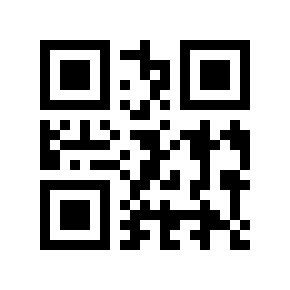

In [7]:
# Especially useful: Installs new packages.
!pip install qrcode
import qrcode
qrcode.make('Colab rocks!')

**Autocompletion and docstrings**

Jupyter shows possible completions of partially typed
commands.

Try it for yourself by displaying all available `tf.` methods that start with `one`.

In [8]:
# YOUR ACTION REQUIRED:
# Set the cursor to after tf.one and press <CTRL-SPACE>.
tf.one_hot #tf.one

<function tensorflow.python.ops.array_ops.one_hot>

In addition, you can also display docstrings to see the function signature and possible parameters.

In [9]:
# YOUR ACTION REQUIRED:
# Complete the command to "maximum" and then add the opening bracket "(" to see
# the function documentation.
tf.maximum([1, 2, 3], [2, 2, 2]) #tf.maximu

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 2, 3], dtype=int32)>

Alternatively, you might also inspect function details with docstrings if available by appending a "?".

In [0]:
tf.maximum?

**Note:** This also works for any other type of object as can be seen below.

In [0]:
test_dict = {'key0': 'Tensor', 'key1': 'Flow'}
test_dict?

## Runtimes

As noted in the introduction above, Colab provides multiple runtimes with different hardware accelerators:

*   CPU (default)
*   GPU
*   TPU

which can be selected by choosing the `"Runtime"` tab above and then `"Change runtime type"`.

Please be aware that selecting a new runtime will assign a new virtual machine (VM).
In general, assume that any changes you make to the VM environment including data storage are **ephemeral**. Particularly, this might require to **execute previous cells again** as their content is unknown to a new runtime otherwise. 

Let's take a closer look at one of such provided VMs.


Once we have been assigned a runtime we can inspect it further.

In [12]:
# Display how long the system has been running.
!uptime

 21:55:27 up 6 min,  0 users,  load average: 0.55, 0.22, 0.11


As can be seen, the machine has been allocated just very recently for our purposes.

**VM specifications**

In [13]:
# Display available and used memory.
!free -h
print("-"*70)
# Display the CPU specification.
!lscpu
print("-"*70)
# Display the GPU specification (if available).
!(nvidia-smi | grep -q "has failed") && echo "No GPU found!" || nvidia-smi 

              total        used        free      shared  buff/cache   available
Mem:            12G        651M        9.6G        848K        2.5G         11G
Swap:            0B          0B          0B
----------------------------------------------------------------------
Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               85
Model name:          Intel(R) Xeon(R) CPU @ 2.00GHz
Stepping:            3
CPU MHz:             2000.168
BogoMIPS:            4000.33
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            1024K
L3 cache:            39424K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse

## Plotting

The notebook environment also provides options to visualize and interact with data.

We'll take a short look at the plotting/visualization libraries Matplotlib and Altair.

### Matplotlib

Matplotlib is one of the most famous Python plotting libraries and can be used to plot results within a cell's output (see [Matplotlib Introduction](https://matplotlib.org/users/intro.html "Matplotlib Introduction")).

Let's try to plot something with it.

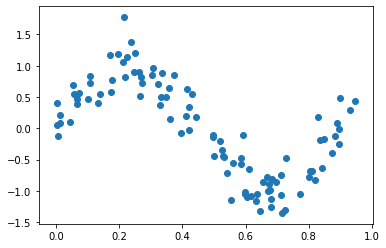

In [14]:
# Display the Matplotlib outputs within a cell's output. 
%matplotlib inline
import numpy as np
from matplotlib import pyplot

# Create a randomized scatterplot using matplotlib.
x = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.3, size=len(x))
y = np.sin(x * 7) + noise
pyplot.scatter(x, y)

### Altair

Another declarative visualization library for Python is Altair (see [Altair: Declarative Visualization in Python](https://altair-viz.github.io/)).

Try to zoom in/out and to hover over individual data points in the resulting plot below.

In [15]:
# Load an example dataset.
from vega_datasets import data
cars = data.cars()

# Plot the dataset, referencing dataframe column names.
import altair as alt
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
    ).interactive()

alt.Chart(...)

## Notebook Magics

The IPython and Colab environment support built-in magic commands called magics (see: [IPython - Magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html)).

In addition to default Python, these commands might be handy for example when it comes to interacting directly with the VM or the Notebook itself.



### Cell magics

Cell magics define a mode for a complete cell and are prefixed with **%%**.

Examples include:

*  **%%bash** or **%%sh**
* **%%html**
* **%%javascript**


In [16]:
%%sh
echo "This is a shell script!"
# List all running VM processes.
ps -ef
echo "Done"

This is a shell script!
UID          PID    PPID  C STIME TTY          TIME CMD
root           1       0  0 21:49 ?        00:00:00 /bin/bash -e /datalab/run.sh
root           8       1  0 21:49 ?        00:00:00 /tools/node/bin/node /datalab/web/app.js
root          18       8  0 21:49 ?        00:00:02 /usr/bin/python2 /usr/local/bin/jupyter-notebook --ip="172.28.0.2" --port=9000 --FileContentsManager.root_dir="/" --MappingKernelManager.root_dir="/content"
root         111       0  0 21:49 ?        00:00:00 tail -n +0 -F /root/.config/Google/DriveFS/Logs/drive_fs.txt
root         119      18 14 21:55 ?        00:00:05 /usr/bin/python3 -m ipykernel_launcher -f /root/.local/share/jupyter/runtime/kernel-6e92a920-e0a5-4fed-baf2-e9c0b346af29.json
root         172     119  0 21:55 ?        00:00:00 sh
root         173     172  0 21:55 ?        00:00:00 ps -ef
Done


In [17]:
# Embed custom HTML directly into a cell's output.
%%html
<marquee>HTML rocks</marquee>

### Line magics 

You can also make use of line magics which can be inserted anywhere at the beginning of a line inside a cell and need to be prefixed with **%**.

Examples include:


*   **%time** - display the required time to execute the current line
*   **%cd** - change the current working directory
*   **%pdb** - invoke an interactive Python debugger
* **%lsmagic** - list all available line magic and cell magic functions



For example, if you want to find out how long one specific line requires to be executed you can just prepend **%time**.


In [18]:
n = 1000000
%time list1 = [i for i in range(n)]
print("")
%time list2 = [i for i in range(int(n/2))]

CPU times: user 44.7 ms, sys: 38.5 ms, total: 83.2 ms
Wall time: 85.8 ms

CPU times: user 23.1 ms, sys: 12.9 ms, total: 36 ms
Wall time: 36 ms


**Note:** Some line magics like **%time** can also be used for complete cells by writing **%%time**.

In [19]:
%%time
n = 1000000
list1 = [i for i in range(n)]
list2 = [i for i in range(int(n/2))]

CPU times: user 89.7 ms, sys: 43 ms, total: 133 ms
Wall time: 136 ms


## Data handling

There are multiple ways to provide data to a Colabs's VM environment.
> **Note:** This section only applies to Colab.
> Jupyter has a file explorer and other options for data handling.

The options include:
*   Uploading files from the local file system.
* Connecting to Google Cloud Storage (explained below).
*   Connecting to Google Drive (see: [Snippets: Drive](https://colab.sandbox.google.com/notebooks/snippets/drive.ipynb); will be used in the next Colabs).

**Uploading files from the local file system**

In [20]:
# Snippet as provided in https://colab.research.google.com/notebooks/io.ipynb
# YOUR ACTION REQUIRED:
# Upload any test file to the target system.
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
# The file should now appear in the current working directory.
!pwd
!ls -l

Saving AMLD.png to AMLD.png
User uploaded file "AMLD.png" with length 13610 bytes
/content
total 20
-rw-r--r-- 1 root root 13610 Jan 24 21:55 AMLD.png
drwxr-xr-x 1 root root  4096 Jan 13 16:38 sample_data


In [0]:
# A file can also be downloaded by using:
from google.colab import files
!touch test_file.txt
files.download('test_file.txt')

**Connecting to Google Cloud Storage**

[Google Cloud Storage](https://cloud.google.com/storage/?hl=de) (GCS) is a cloud file storage service with a RESTful API.

We can utilize it to store our own data or to access data provided by the following identifier:


```
gs://[BUCKET_NAME]/[OBJECT_NAME]
```

We'll use the data provided in **gs://amld-datasets/zoo_img** as can be seen below.

Before we can interact with the cloud environment, we need to grant permissions accordingly (also see [External data: Cloud Storage](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=S7c8WYyQdh5i)).

In [0]:
from google.colab import auth
auth.authenticate_user()

List a subset of the contained files using the [gsutil tool](https://cloud.google.com/storage/docs/gsutil?hl=en).

In [23]:
!gsutil ls gs://amld-datasets/zoo_img | head

gs://amld-datasets/zoo_img/counts.json
gs://amld-datasets/zoo_img/eval-00000-of-00100
gs://amld-datasets/zoo_img/eval-00001-of-00100
gs://amld-datasets/zoo_img/eval-00002-of-00100
gs://amld-datasets/zoo_img/eval-00003-of-00100
gs://amld-datasets/zoo_img/eval-00004-of-00100
gs://amld-datasets/zoo_img/eval-00005-of-00100
gs://amld-datasets/zoo_img/eval-00006-of-00100
gs://amld-datasets/zoo_img/eval-00007-of-00100
gs://amld-datasets/zoo_img/eval-00008-of-00100


Conveniently, TensorFlow natively supports multiple file systems such as:

*   GCS - Google Cloud Storage
*   HDFS - Hadoop
*   S3 - Amazon Simple Storage

An example for the GCS filesystem can be seen below.

In [24]:
# Note: This cell hangs if you forget to call auth.authenticate_user() above.
tf.io.gfile.glob('gs://amld-datasets/zoo_img/*')[:10]

['gs://amld-datasets/zoo_img/counts.json',
 'gs://amld-datasets/zoo_img/eval-00000-of-00100',
 'gs://amld-datasets/zoo_img/eval-00001-of-00100',
 'gs://amld-datasets/zoo_img/eval-00002-of-00100',
 'gs://amld-datasets/zoo_img/eval-00003-of-00100',
 'gs://amld-datasets/zoo_img/eval-00004-of-00100',
 'gs://amld-datasets/zoo_img/eval-00005-of-00100',
 'gs://amld-datasets/zoo_img/eval-00006-of-00100',
 'gs://amld-datasets/zoo_img/eval-00007-of-00100',
 'gs://amld-datasets/zoo_img/eval-00008-of-00100']

## Snippets

Finally, we can take a look at the snippets support in Colab.
> If you're using Jupyter please see [Jupyter contrib nbextensions - Snippets menu](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/snippets_menu/readme.html) as this is not natively supported.

Snippets are a way to quickly "bookmark" pieces of code or text that you might want to insert into specific cells.






In [0]:
# YOUR ACTION REQUIRED:
# Explore existing snippets by going to the `Code snippets` section.
# Click on the <> button on the left sidebar to open the snippets.
# Alternatively, you can press `<CTRL><ALT><P>` (or `<COMMAND><OPTION><P>` for OS X).

We have created some default snippets for this workshop in:
> https://colab.research.google.com/drive/1OFSjEmqC-UC66xs-LR7-xmgkvxYTrAcN

In order to use these snippets, you can:

1.   Click on "Tools > Settings".
2.   Copy the above url into "Custom snippet notebook URL" and press enter.

As soon as you update the settings, the snippets will then become available in every Colab. Search for "amld" to quickly find them.

Alternatively, you can also add snippets via the API (but this needs to be done for every Colab/kernel):

In [0]:
from google.colab import snippets
# snippets.register('https://colab.research.google.com/drive/1OFSjEmqC-UC66xs-LR7-xmgkvxYTrAcN')

**Pro tip** : Maybe this is a good moment to create your own snippets and register them in settings. You can then start collecting often-used code and have it ready when you need it...

# ----- Optional part -----

## Custom line magic

You can also define your own line/cell magic in the following way.

In [0]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def mymagic(line_content, cell_content=None):
  print('line_content="%s" cell_content="%s"' % (line_content, cell_content))

In [28]:
%mymagic Howdy Alice!

line_content="Howdy Alice!" cell_content="None"


In [29]:
%%mymagic simple question
Howdy Alice!
how are you?

line_content="simple question" cell_content="Howdy Alice!
how are you?"


## Forms

You can simplify cells by hiding their code and displaying a form instead.


**Note:** You can display or hide the code by double clicking the form which might be on the right side.

In [30]:
#@title Execute me

# Hidden cell content.
print("Double click the cell to see its content.")


Double click the cell to see its content.


In [31]:
# Form example mostly taken from "Adding form fields" Snippet.
#@title Example form
#@markdown Specify some test data and execute this cell.

string_type = 'test_string' #@param {type: "string"}
slider_value = 145  #@param {type: "slider", min: 100, max: 200}
number = 1339  #@param {type: "number"}
date = '2019-01-26'  #@param {type: "date"}
pick_me = "a"  #@param ['a', 'b', 'c']
#@markdown ---
print("Submitted data:")
print(string_type, slider_value, number, date, pick_me)

Submitted data:
test_string 145 1339 2019-01-26 a


## Interactive debugging

An example of an IPython tool that you can utilize is the interactive debugger 
provided inside an IPython environment like Colab.

For instance, by using **%pdb on**, you can automatically trigger the debugger on exceptions to further analyze the state.

Some useful debugger commands are:

Description | Command
---|---
**h**(elp) | Display available commands
**p**(rint) `x` | Show content of object `x`
**w**(here) | Show current instruction pointer position
**q**(uit) | Leave the debugger

In [32]:
# YOUR ACTION REQUIRED:
# Execute this cell, print the variable contents of a, b and exit the debugger.
%pdb on
a = 67069 / 47 - 0x5a
b = a - 0x539
#c = a / b  # Will throw an exception.

Automatic pdb calling has been turned ON


We'll not dive further into debugging but it's useful to know that this option exists.

Please see [Python Docs - pdb The Python Debugger](https://docs.python.org/2/library/pdb.html) for more information.

## A Word of Warning

While notebook environments like Colab/Jupyter provide many benefits, they also come with some caveats that you should be aware of.
One example is that you might quickly execute cells in a wrong order leading to unexpected behavior.

If you're interested in more examples feel free to take a look at:

[Youtube - I don't like notebooks by Joel Grus](https://www.youtube.com/watch?v=7jiPeIFXb6U) (duration ~56 minutes)